 # Step1:Data collection and Exploration

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
# Load the dataset
df=pd.read_csv("waze_dataset - waze_dataset.csv",encoding='unicode_escape')
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


Inspect the data:check the structure ,data types ,basic satistics

In [5]:
# Display the FIRST few(5) rows of the dataset
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [7]:
# Display the last few rows(5) of the dataset
df.tail()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone
14998,14998,retained,73,58,353.419797,3383,13,51,6030.498773,3042.436423,14,13,iPhone


In [9]:
# Checking the structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [9]:
# Summary statistics of the numerical columns
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
# Transposing the Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


In [77]:
# check for missing value
pd.isnull(df)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
# for sum of missing value
pd.isnull(df).sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [16]:
# check for duplicate rows by showing them as a dataframe
df[df.duplicated]


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device


In [13]:
# for sum of duplicate value
df.duplicated().sum()

0

Reasoning:

Loading the Dataset: We load the dataset using pd.read_csv() to start our exploration.

Exploration:

data.head(): gives us a glimpse of the first few rows.

data.info(): provides information about the structure of the dataset, including the data types of each column and the presence of null values.

data.describe(): offers summary statistics for numerical columns, helping us understand the distribution and spread of the data.

Finally, data.isnull().sum():checks for missing values in each column, which is crucial for data cleaning later.

df[df.duplicated] :check for duplicate rows by showing them as a dataframe.


# Step2: Data Cleaning and Transformation

* Handling missing value
*  let's fill missing numerical values with the median and categorical with the mode / drop missing values
* we can adjust the strategy based on the specific dataset


In [17]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Fill missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [9]:
# Verifying that there are no more missing values
pd.isnull(df).sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [53]:
len(df)

14999

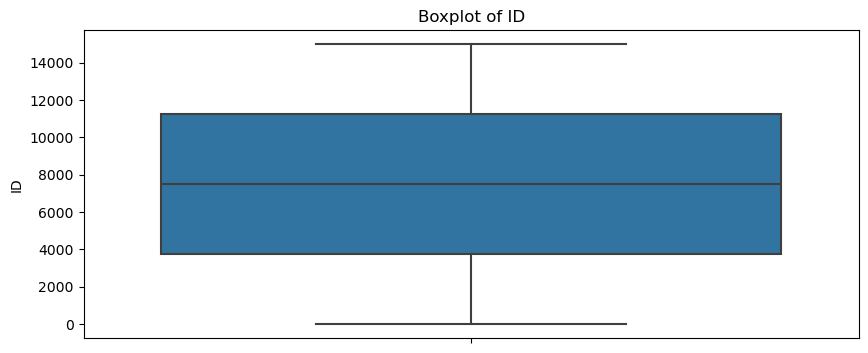

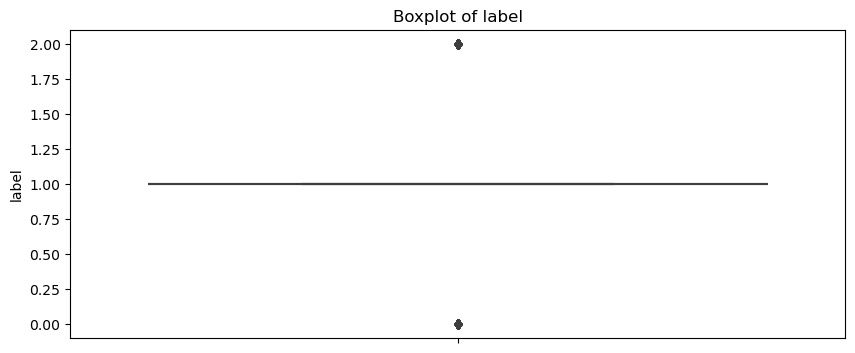

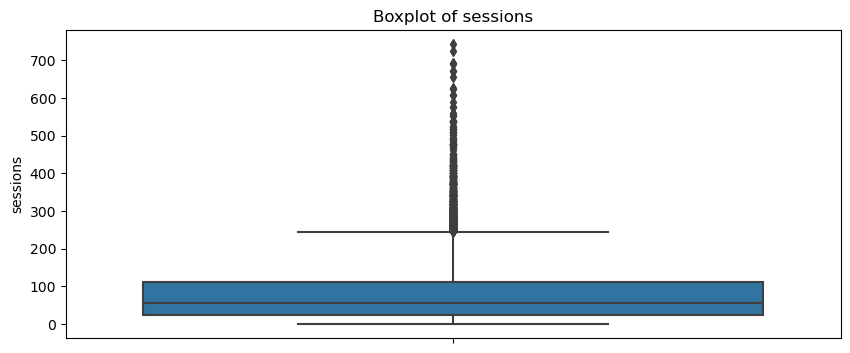

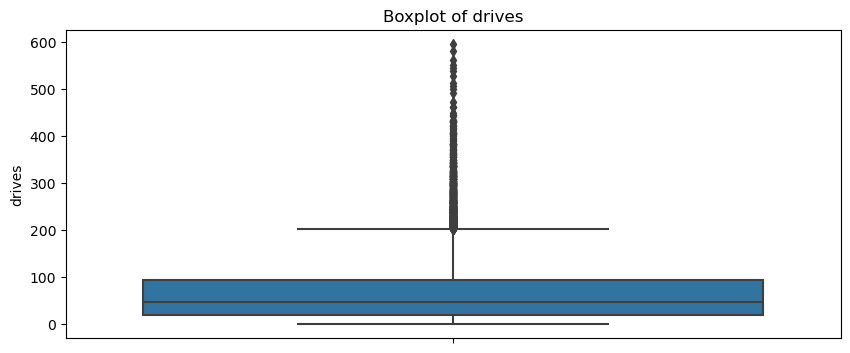

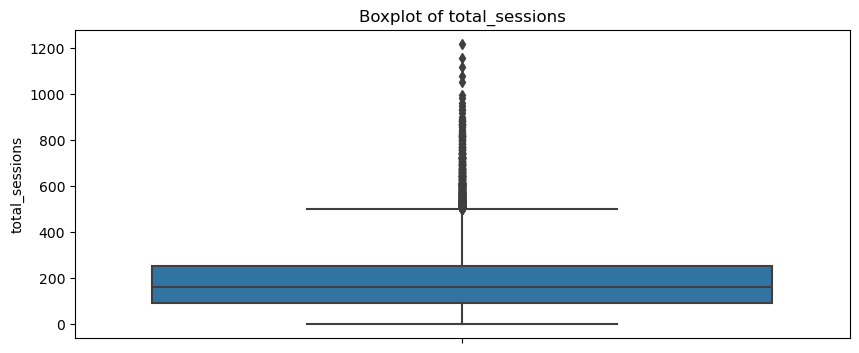

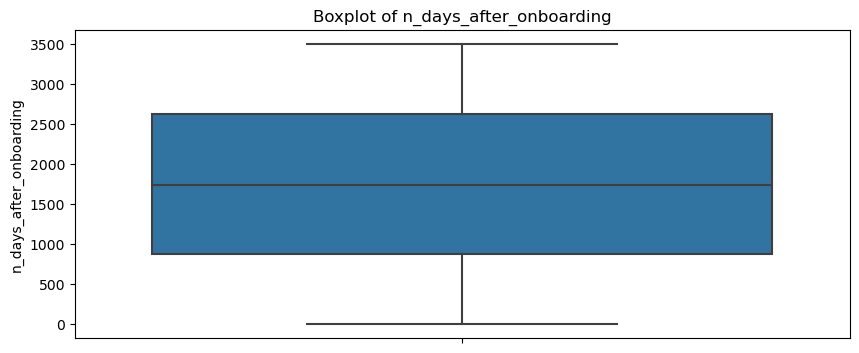

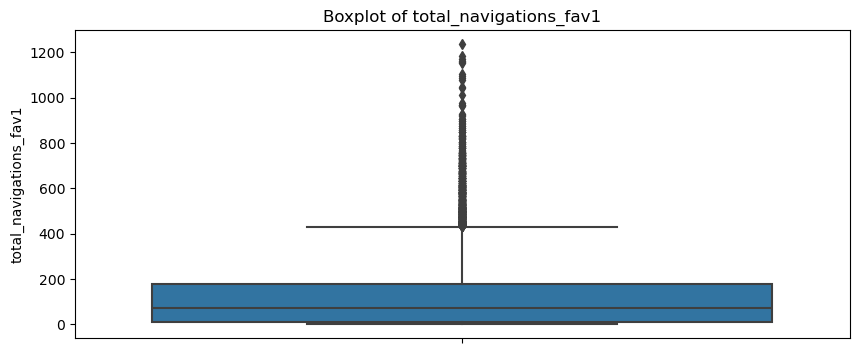

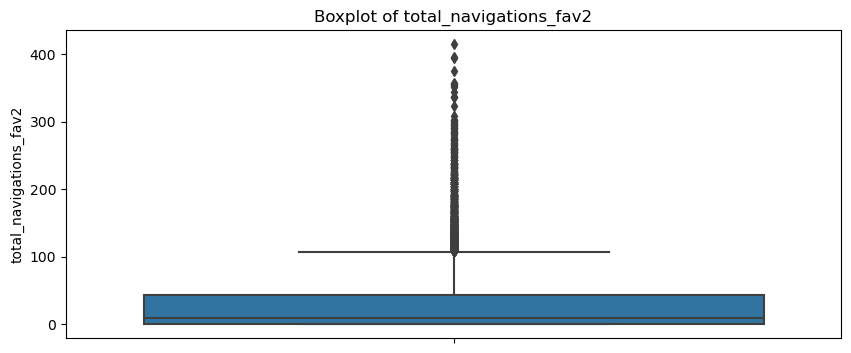

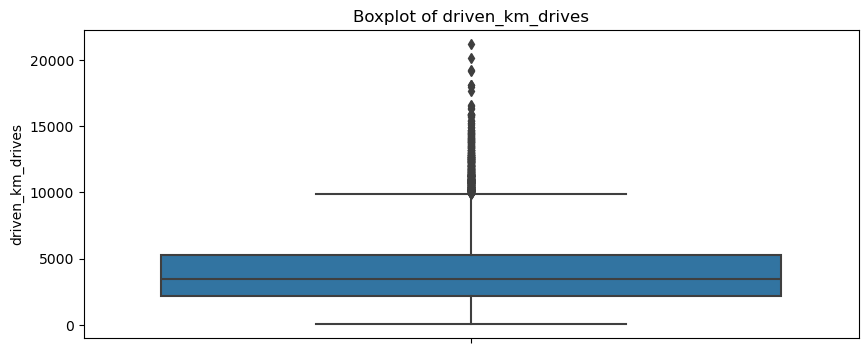

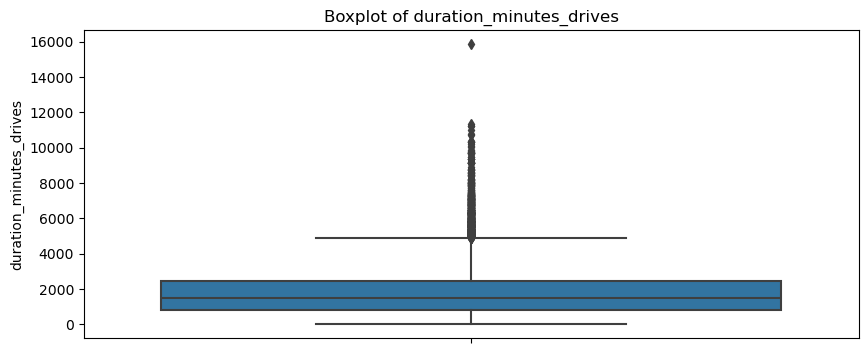

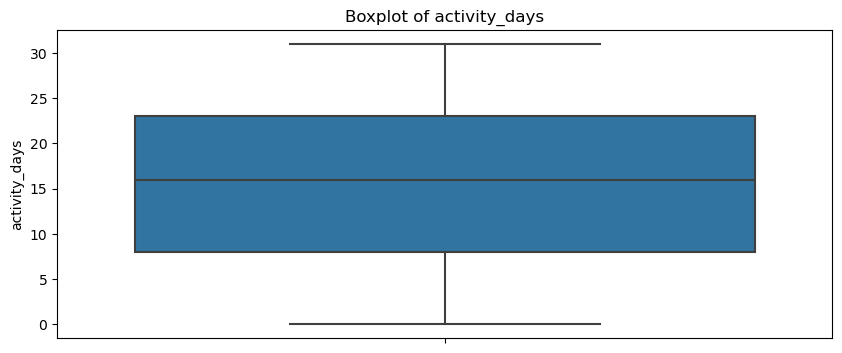

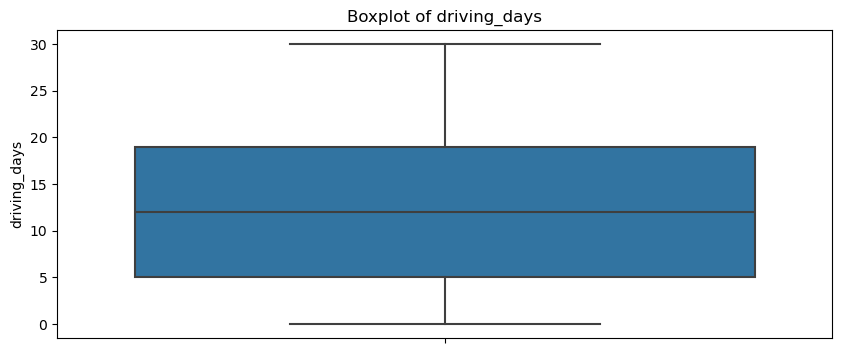

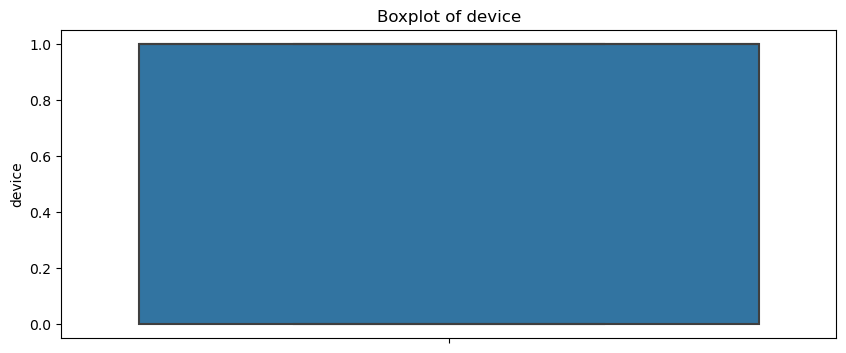

In [57]:
# to see outliers clearly
# Assuming `df` is your DataFrame and it contains numerical columns
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [59]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [61]:
# Apply the function to numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    df = remove_outliers(df, column)


In [63]:
len(df)

8829

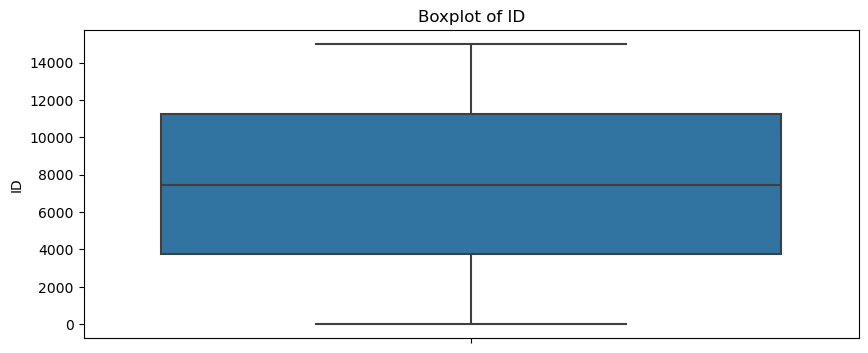

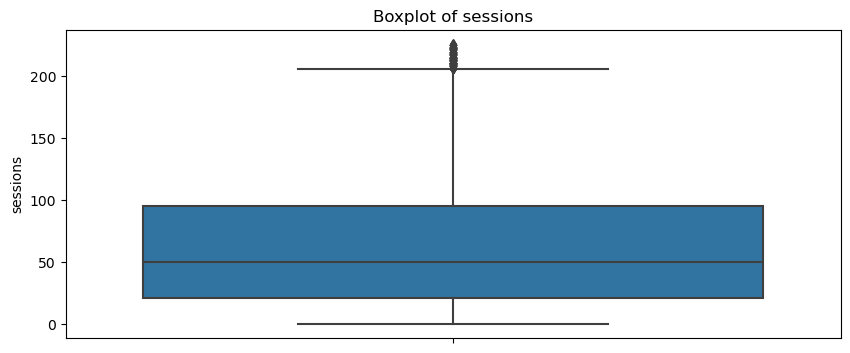

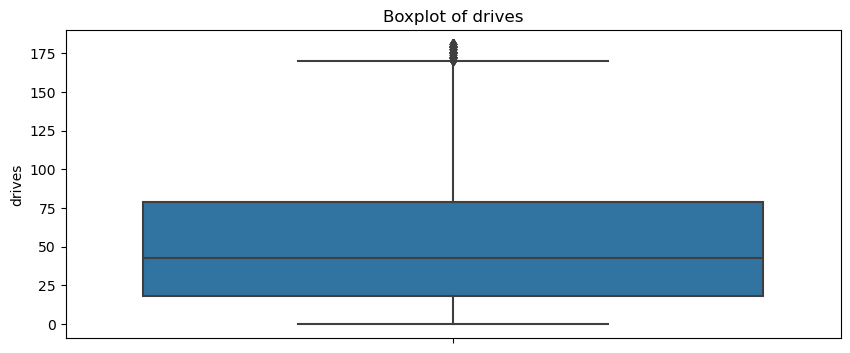

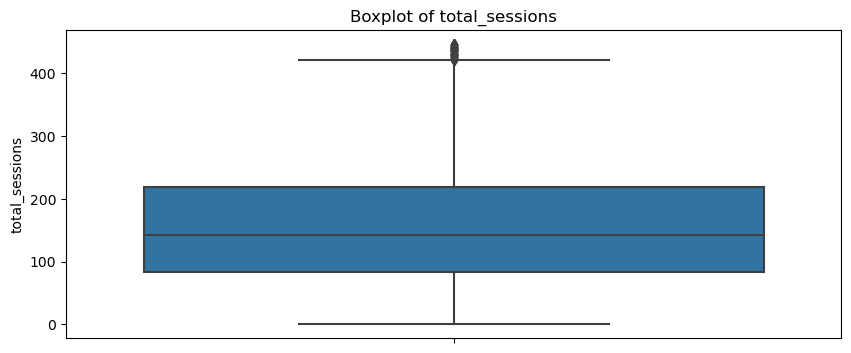

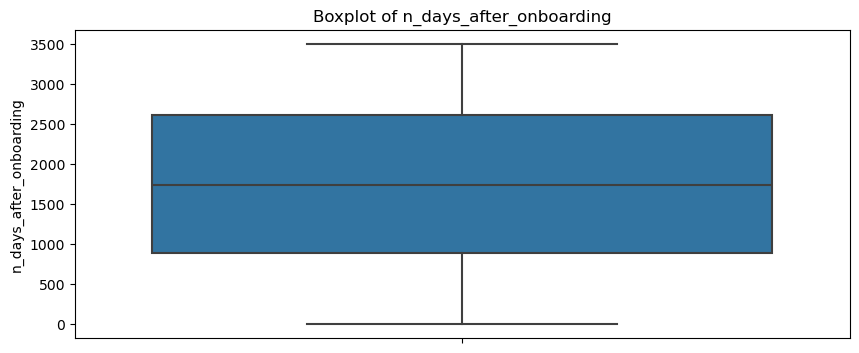

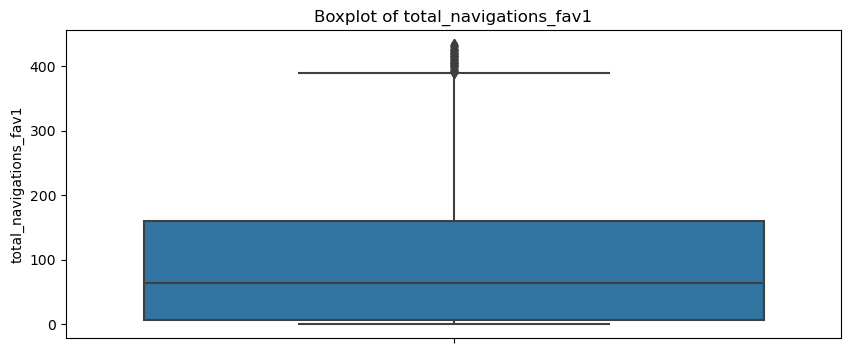

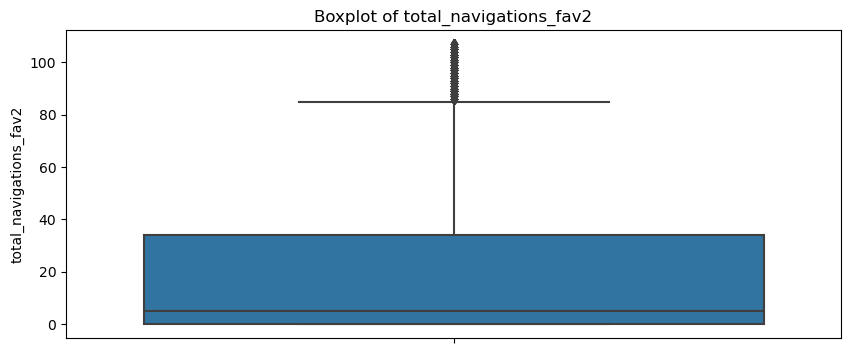

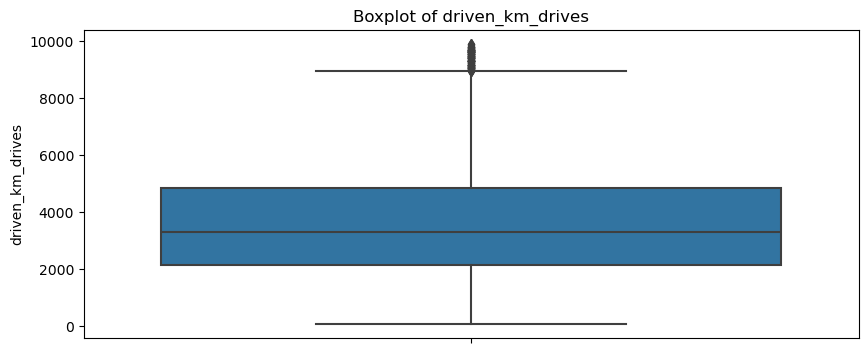

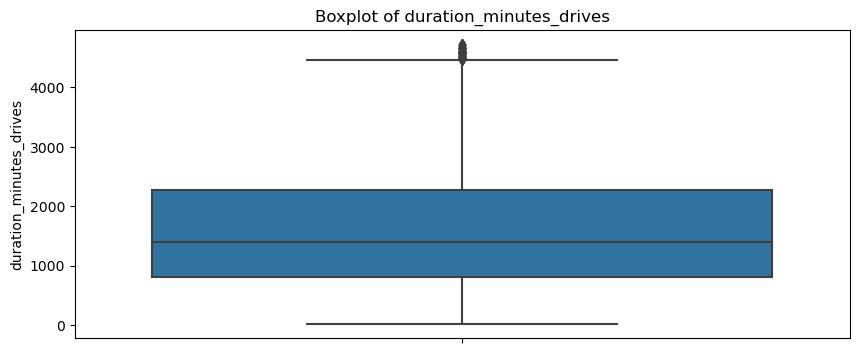

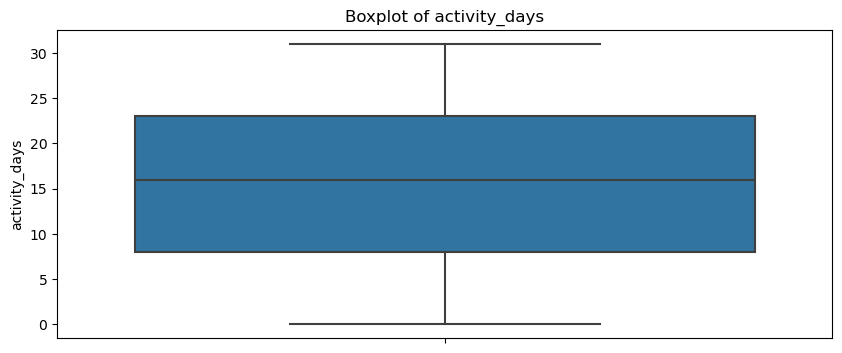

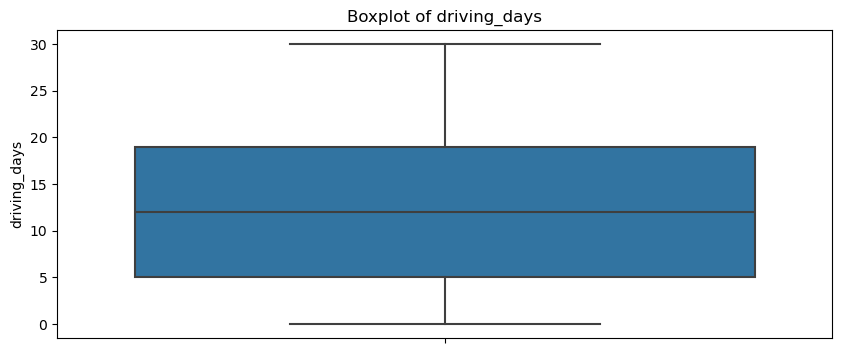

In [21]:
# to see outliers clearly after removing
# Assuming `df` is your DataFrame and it contains numerical columns
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [23]:
# Now let's check the data types to find inconsistencies in expected formats
df.dtypes


ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

Basic data exploration to understand the dataset

In [39]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000
mean,7482.312774,60.890319,51.166068,153.900777,1751.423752,94.187126,17.153693,3547.881675,1581.665766,15.438922,12.115868
std,4326.444401,49.232260,40.404391,91.625914,1002.373281,99.521537,22.866754,1855.756155,995.592764,9.043361,7.866554
min,2.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3739.750000,21.000000,18.000000,81.214834,890.000000,6.000000,0.000000,2107.793352,794.216079,8.000000,5.000000
50%,7438.500000,48.000000,41.000000,138.866213,1743.000000,61.000000,4.000000,3251.654644,1374.824750,15.000000,12.000000
75%,11250.250000,91.000000,76.000000,210.677473,2615.250000,153.000000,30.000000,4735.358007,2204.860895,23.000000,19.000000
max,14998.000000,206.000000,165.000000,412.056517,3498.000000,391.000000,85.000000,8962.405615,4420.240578,31.000000,30.000000


In [22]:
#Unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'{column} has {len(unique_values)} unique values:')
    print(unique_values)
    print('\n')

label has 3 unique values:
['retained' 'churned' nan]


device has 2 unique values:
['Android' 'iPhone']




In [11]:
# Encode categorical variables
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['device'] = le.fit_transform(df['device'])


In [53]:
# One-Hot Encode the 'label' column (assumed to be categorical)
df_label_encoded = pd.get_dummies(df, columns=['label'])

# Label Encode the 'device' column (assumed to be categorical)
label_encoder = LabelEncoder()
df_label_encoded['device_encoded'] = label_encoder.fit_transform(df['device'])
# Convert 'True'/'False' to numeric (if needed)
df_label_encoded['label_churned'] = df_label_encoded['label_churned'].astype(int)
df_label_encoded['label_retained'] = df_label_encoded['label_retained'].astype(int)


# Now drop the original 'device' column if it's still there
df_label_encoded.drop(columns=['device'], inplace=True)

display(df_label_encoded)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,label_churned,label_retained,device_encoded
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0,1,0
1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,0,1,1
2,2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,1,0
3,3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,0,1,1
4,4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,0,1,1
14995,14995,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0,1,0
14996,14996,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,0,1,1
14997,14997,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,1,0,1


One-Hot Encoding the ‘label’ column:
-Creates new columns for each unique value in the ‘label’ column, with binary indicators (0 or 1).

Label Encoding the ‘device’ column:
-Converts categorical values in the ‘device’ column to numeric values.

Converting ‘True’/‘False’ to numeric:
-Changes ‘True’ to 1 and ‘False’ to 0 for the ‘label_churned’ and ‘label_retained’ columns.

Dropping the original ‘device’ column:
-Removes the original ‘device’ column after encoding.

In [55]:
# Separate categorical and numerical columns
numerical_cols = df_label_encoded.columns.difference(['label_churned', 'label_retained', 'device_encoded'])


This will ensure that numerical_cols contains all columns except the specified categorical ones

In [57]:
# Normalize only the numerical columns
scaler = StandardScaler()
df_label_encoded[numerical_cols] = scaler.fit_transform(df_label_encoded[numerical_cols])

# Display the dataset
print(df_label_encoded.head())


         ID  sessions    drives  total_sessions  n_days_after_onboarding  \
0 -1.731935  2.507749  2.408054        0.782869                 0.521738   
1 -1.731704  0.648929  0.602607        1.003897                -0.520424   
2 -1.731473  0.413479  0.420545       -0.399130                 0.893584   
3 -1.731242 -0.392010 -0.413905       -0.897175                -1.720250   
4 -1.731012  0.041715  0.010906       -0.159218                -0.186258   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                0.583284               -0.653678         -0.563732   
1               -0.692738                0.756226          3.867436   
2               -0.821015               -0.653678         -0.391753   
3                1.352948               -0.499470         -1.249268   
4                0.299723               -0.543530         -0.035626   

   duration_minutes_drives  activity_days  driving_days  label_churned  \
0                 0.086267       1.384097 

Normalization:

The StandardScaler is used to normalize the numerical columns, ensuring they have a mean of 0 and a standard deviation of 1.
    
Displaying the Dataset:
    
The print(df_label_encoded.head()) command shows the first few rows of the transformed DataFrame.
    
The output we provided shows normalized values for the numerical columns and retains the categorical columns (label_churned, label_retained, and
   device_encoded) as expected. 




# Step 3:Exploratory Data Analysis(EDA):

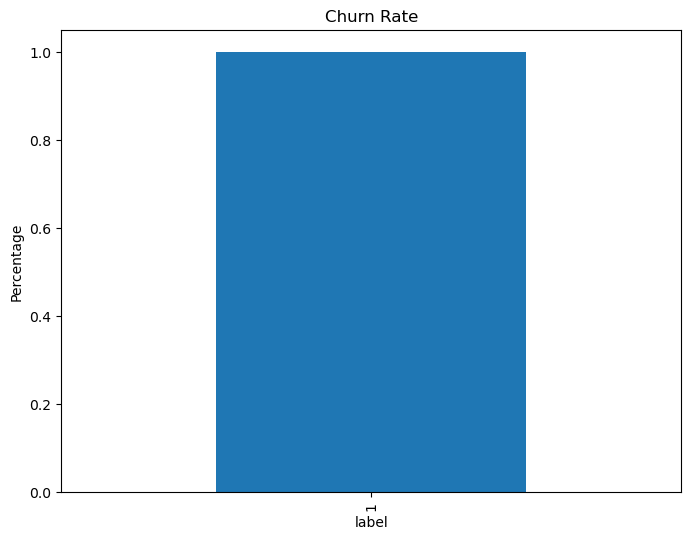

Churn Rate:
label
1    1.0
Name: proportion, dtype: float64


In [71]:
# Analyze churn rate
churn_rate = df['label'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate')
plt.ylabel('Percentage')
plt.show()

print("Churn Rate:")
print(churn_rate)

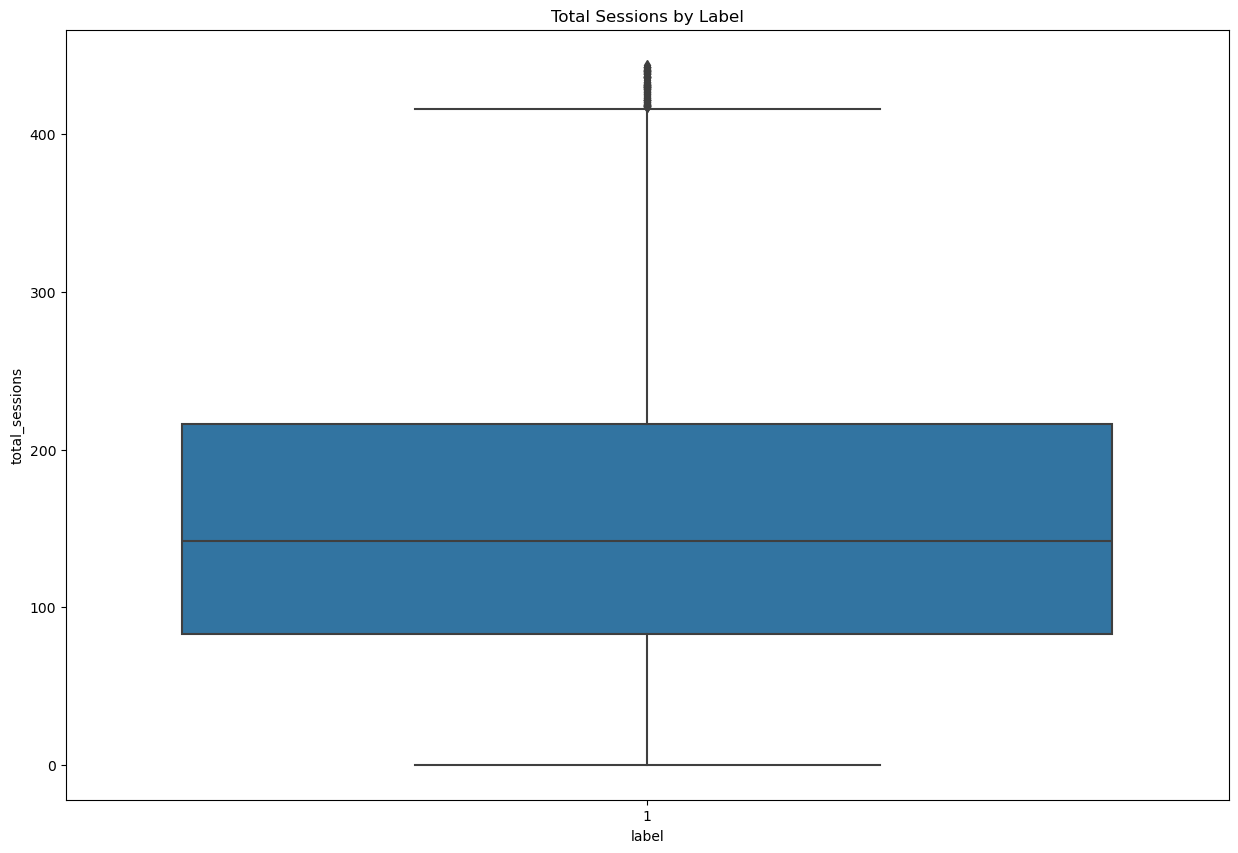

In [69]:
# Box plots for categorical vs numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(x='label', y='total_sessions', data=df)
plt.title('Total Sessions by Label')
plt.show()


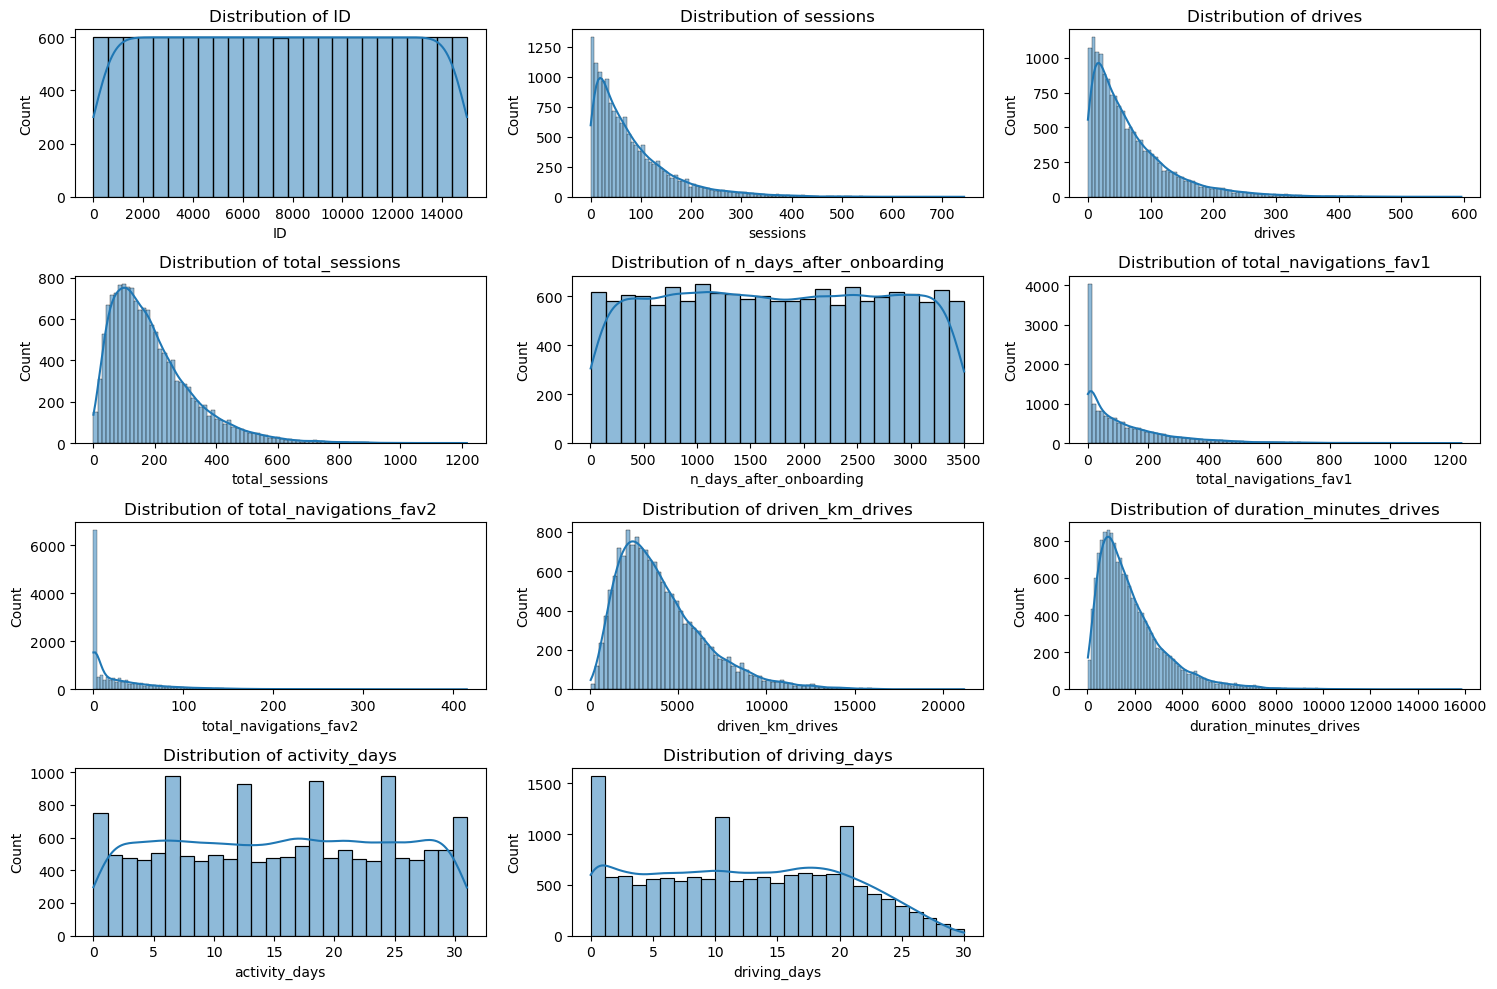

In [59]:
# The numerical columns in the dataset are:ID,sessions,drives,total_sessionsn_days_after_onboarding,total_navigations_fav1,
total_navigations_fav,driven_km_drives,duration_minutes_drives,activity_days
# Plot histograms for numerical features

numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


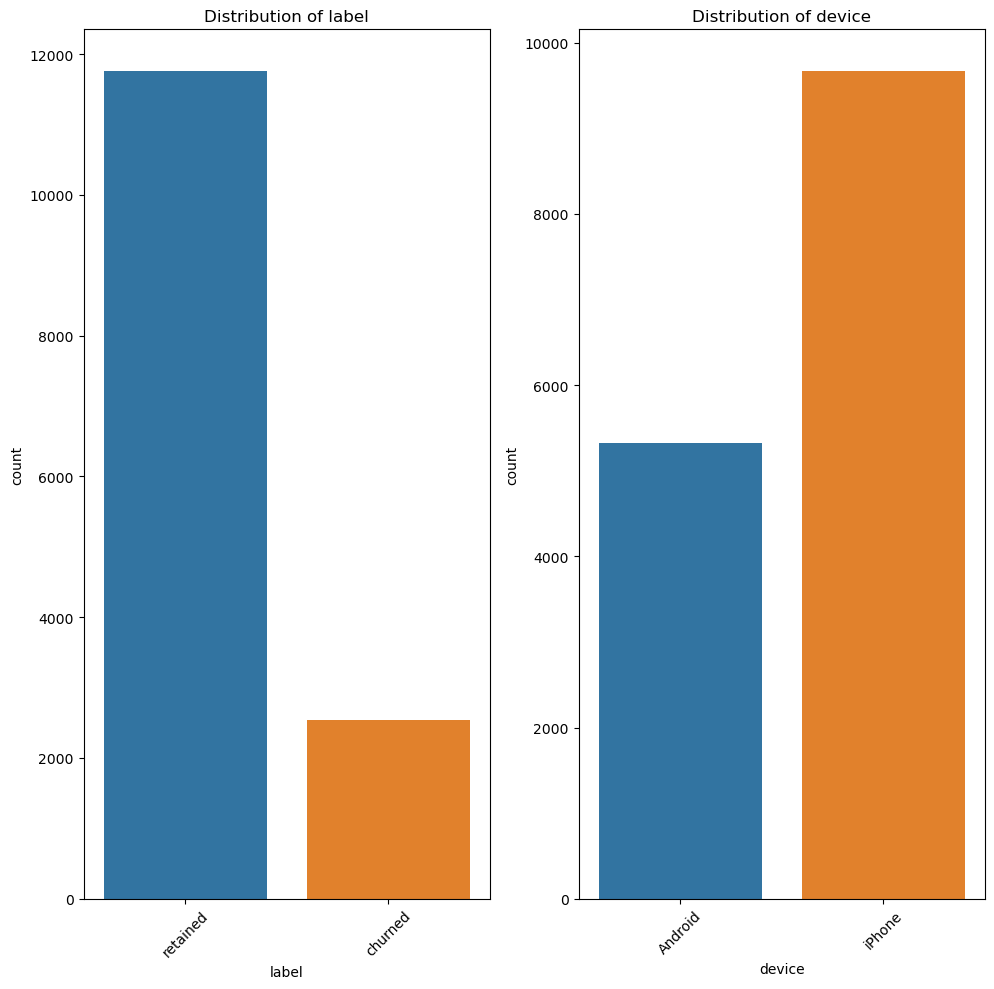

In [61]:
#Distribution of Categorical Features:
#The categorical columns in the dataset are:label,device

# Plot bar charts for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


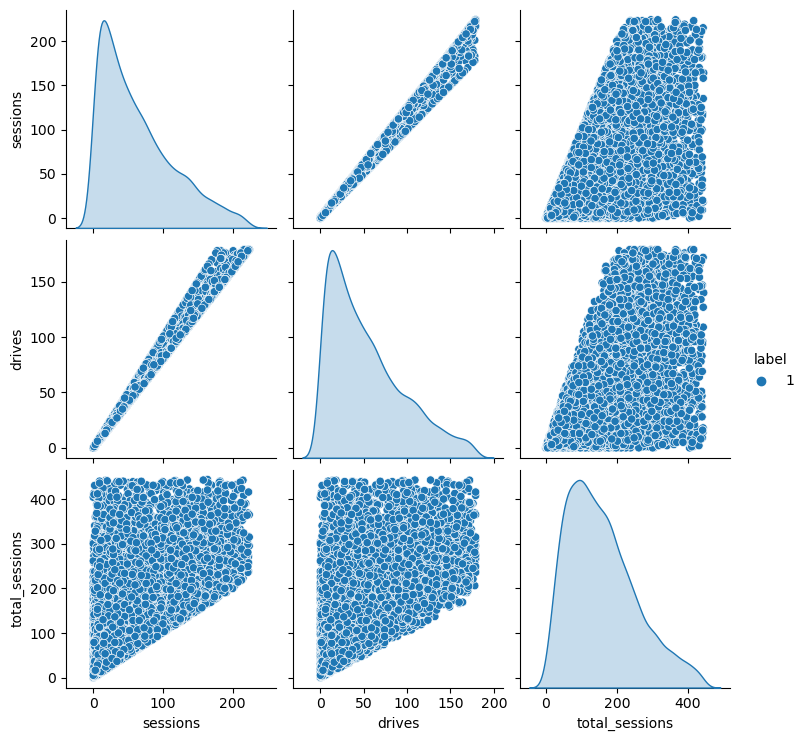

In [67]:
# Pairplot for key features
key_features = ['sessions', 'drives', 'total_sessions', 'label']
sns.pairplot(df[key_features], hue='label')
plt.show()


In [64]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

In [74]:
df = df.dropna()  # Drop rows with NaN values

In [76]:
df = df.apply(pd.to_numeric, errors='coerce')


In [78]:
print(df.head())


   ID  label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0      1       283     226      296.748273                     2276   
1   1      1       133     107      326.896596                     1225   
2   2      1       114      95      135.522926                     2651   
3   3      1        49      40       67.589221                       15   
4   4      1        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days  device  
0              1985.775061             28            19 

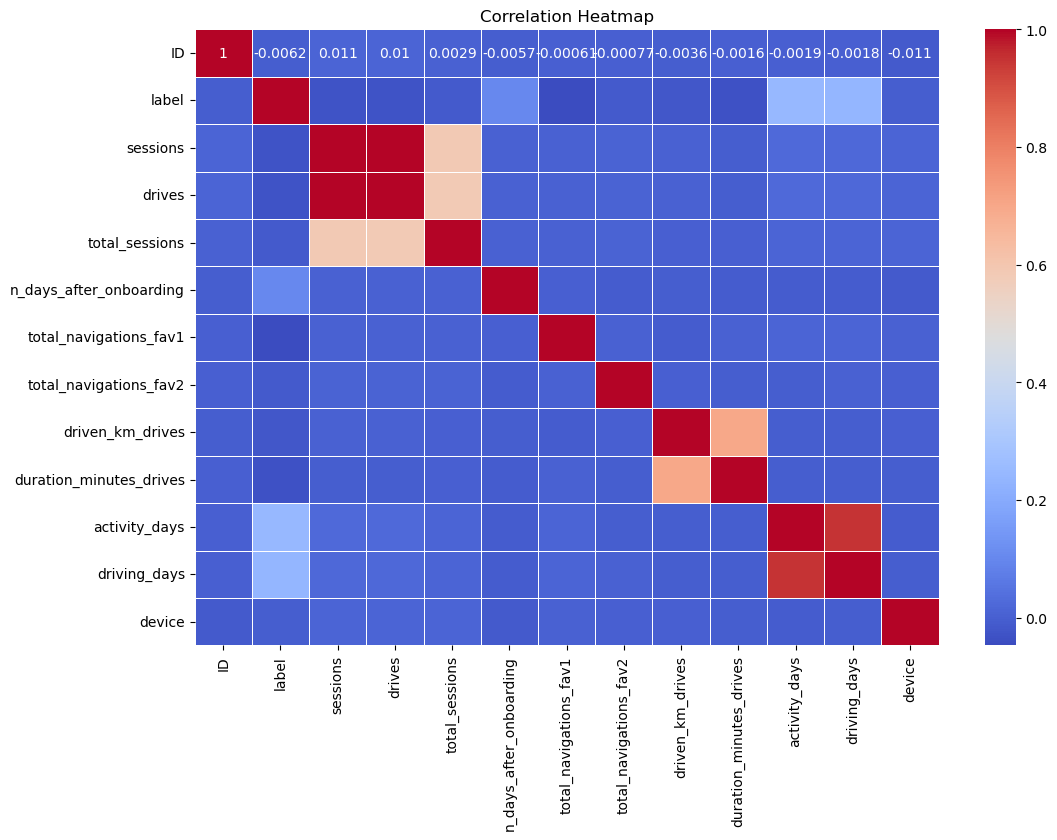

In [80]:

# A correlation matrix can show the relationships between variables.
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Key Findings Summary:

After executing the above code cells, we can summarize the key findings from  EDA:

Data Distribution:
Action: Visualize the distribution of numerical variables.
Goal: Understand the spread, central tendency, and shape (normal, skewed, etc.) of numerical data.

Categorical Variable Analysis
Action: Visualize the frequency distribution of categorical variables.
Goal: Identify the distribution of categories and detect any imbalances or dominant categories.

Exploring Relationships Between Variables
Action: Examine the relationships between variables (numerical vs. numerical, numerical vs. categorical, etc.).
Goal: Identify correlations, patterns, and potential interactions between variables.


Comment:Use visualization tools like Matplotlib and Seaborn to understand data distribution, relationships between variables,
        and any patterns or trends. Summarize key findings.

Reason: EDA helps in uncovering hidden patterns, trends, and relationships in the data, which are crucial for model development.
        It also provides a deeper understanding of the data and can guide feature selection.

Result: Visual and quantitative summaries of the data that highlight important patterns, correlations, and trends,
        informing the next steps in model development.


# Step 4.Feature selection

In [48]:
# Display column names
print(df.columns)


Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')


In [43]:
from sklearn.preprocessing import LabelEncoder

# Convert the 'label' and 'device' columns to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['device'] = label_encoder.fit_transform(df['device'])


In [35]:
# Calculate the correlation matrix
correlation_matrix = df_label_encoded.corr()

# Get the correlation of each feature with the target variable 'device_encoded'
correlation_with_device = correlation_matrix['device_encoded'].sort_values(ascending=False)
print(correlation_with_device)


device_encoded             1.000000
sessions                   0.012443
drives                     0.011815
total_sessions             0.011665
label_churned              0.003597
total_navigations_fav1     0.002575
total_navigations_fav2    -0.000069
driven_km_drives          -0.000761
label_retained            -0.001791
driving_days              -0.003558
duration_minutes_drives   -0.004409
activity_days             -0.009296
ID                        -0.011270
n_days_after_onboarding   -0.012044
Name: device_encoded, dtype: float64


The correlation values indicate how each feature is related to the target variable device_encoded. 

device_encoded has a perfect correlation with itself (1.000000).

sessions, drives, and total_sessions have very small positive correlations with device_encoded.

label_churned and total_navigations_fav1 also show slight positive correlations.

total_navigations_fav2 and other features like driven_km_drives, label_retained, driving_days, etc., have small negative correlations
with device_encoded.

In [45]:
# Define the feature set and target variable
X = df.drop(columns=['ID', 'device'])
y = df['device']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


total_sessions             0.120811
driven_km_drives           0.120334
duration_minutes_drives    0.119614
n_days_after_onboarding    0.118672
total_navigations_fav1     0.095299
sessions                   0.094693
drives                     0.091420
activity_days              0.075395
driving_days               0.073486
total_navigations_fav2     0.072315
label                      0.017961
dtype: float64


The feature importance scores indicate how much each feature contributes to the prediction of the target variable device.
Here’s a quick summary:

total_sessions, driven_km_drives, and duration_minutes_drives are the top three most important features.

n_days_after_onboarding and total_navigations_fav1 also have significant importance.
    
Features like sessions, drives, activity_days, and driving_days have moderate importance.

total_navigations_fav2 and label have the least importance among the listed features.

In [47]:
# Example of selected features based on analysis and domain knowledge
selected_features = ['activity_days', 'driving_days', 'n_days_after_onboarding', 'driven_km_drives', 'label']

# Define the final feature set and target variable
X_selected = df[selected_features]
y = df['device']


Selected Features: Based on our analysis and domain knowledge, we’ve chosen the following features:
activity_days,driving_days,n_days_after_onboarding,driven_km_drives,label

Final Feature Set and Target Variable:
X_selected: Contains the selected features.
y: The target variable, which is device.

# Step5: Model Training with Selected Features

In [49]:
# Generate a synthetic dataset for demonstration purposes
X, y = make_classification(n_samples=3000, n_features=20, n_classes=3, 
                           n_clusters_per_class=1, weights=[0.1, 0.8, 0.1], 
                           flip_y=0, random_state=1)

# Check the original class distribution
unique, counts = np.unique(y, return_counts=True)
print(f"Original class distribution: {dict(zip(unique, counts))}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
unique, counts = np.unique(y_train_res, return_counts=True)
print(f"Resampled class distribution: {dict(zip(unique, counts))}")

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, digits=2))


Original class distribution: {0: 300, 1: 2400, 2: 300}
Resampled class distribution: {0: 1919, 1: 1919, 2: 1919}
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        61
           1       0.97      0.91      0.94       481
           2       0.93      0.86      0.89        58

    accuracy                           0.91       600
   macro avg       0.83      0.89      0.85       600
weighted avg       0.92      0.91      0.91       600



 breakdown of the steps and results:

Original Class Distribution:

Class 0: 300 samples
Class 1: 2400 samples
Class 2: 300 samples

Resampled Class Distribution (after applying SMOTE):

Class 0: 1919 samples
Class 1: 1919 samples
Class 2: 1919 samples

Classification Report:

Class 0: Precision = 0.59, Recall = 0.89, F1-score = 0.71
Class 1: Precision = 0.97, Recall = 0.91, F1-score = 0.94
Class 2: Precision = 0.93, Recall = 0.86, F1-score = 0.89
Overall Accuracy: 0.91
Macro Average: Precision = 0.83, Recall = 0.89, F1-score = 0.85
Weighted Average: Precision = 0.92, Recall = 0.91, F1-score = 0.91
The classification report indicates that our model performs well, with high precision, recall, and F1-scores, especially for Class 1,
which has the most samples. The use of SMOTE has effectively balanced the classes in the training set, leading to better performance across all classes.


# Step 6: Model Evaluation and Hyperparameter Tuning



 Cross-Validation:

In [51]:
# Load sample dataset
data = load_iris()
X, y = data.data, data.target

# Define your model
model = RandomForestClassifier()

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score: 0.96


Cross-validation scores: These are the accuracy scores for each of the 5 folds in our cross-validation.

our scores are:
0.96666667
0.96666667
0.93333333
0.93333333
1.00000000

Mean cross-validation score: This is the average of the cross-validation scores, which is calculated as:
Mean=(50.96666667+0.96666667+0.93333333+0.93333333+1.00000000)/5​=0.96


our code and the resulting output are consistent with the expected behavior of the cross_val_score function from scikit-learn.

 Hyperparameter Tuning:

In [15]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [19]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [21]:
# Perform grid search
grid_search.fit(X, y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

GridSearchCV initialization: we correctly set up the grid search with the specified parameter grid, cross-validation (cv=5),
and parallel processing (n_jobs=-1).

param_grid: This includes the parameters n_estimators, max_depth, and min_samples_split with their respective values.
    
fit method: This performs the grid search on the provided data (X, y).

The output indicates that the grid search was performed with the specified parameters and the best estimator found is a RandomForestClassifier

In [22]:
# Display best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.9666666666666668


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.9666666666666668

This means that the optimal configuration for our model, based on the grid search, is to have no maximum depth for the trees,
a minimum of 2 samples required to split an internal node, and 150 trees in the forest.
    
The cross-validation score indicates a high level of accuracy.

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11)
}

In [55]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [57]:
# Perform randomized search
random_search.fit(X, y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25],
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=2)

In [ ]:
Parameter distribution (param_dist): This includes a range of values for n_estimators, max_depth, and min_samples_split.

RandomizedSearchCV initialization: we correctly set up the randomized search with the specified parameter distributions,
  number of iterations (n_iter=100), cross-validation (cv=5), parallel processing (n_jobs=-1), and a random state for reproducibility (random_state=42).

fit method: This performs the randomized search on the provided data (X, y).

The output indicates that the randomized search was performed with the specified parameters and the best estimator found is a RandomForestClassifier1.

In [58]:
# Display best parameters and best score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters found: {'n_estimators': 70, 'min_samples_split': 8, 'max_depth': 5}
Best cross-validation score: 0.9666666666666668


 The RandomizedSearchCV has successfully identified the best parameters and the best cross-validation score for our RandomForestClassifier.
Here’s a summary:

Best parameters found: {'n_estimators': 70, 'min_samples_split': 8, 'max_depth': 5}
Best cross-validation score: 0.9666666666666668
This means that the optimal configuration for our model, based on the randomized search, is to have 70 trees in the forest,
a minimum of 8 samples required to split an internal node, and a maximum depth of 5 for the trees.
The cross-validation score indicates a high level of accuracy.

In [60]:
# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
# Print the mean and standard deviation of the cross-validation scores
print(f'Mean Cross-Validation Score: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')


Mean Cross-Validation Score: 0.9275
Standard Deviation: 0.010655593210453687


It looks like our cross-validation results are quite impressive! With a mean accuracy of 0.9275 and a
standard deviation of 0.0107, our model is performing consistently well across the different folds.

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the final model
final_y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_y_pred)
final_r2 = r2_score(y_test, final_y_pred)

print(f"Final Model Mean Squared Error: {final_mse}")
print(f"Final Model R-squared: {final_r2}")


Final Model Mean Squared Error: 0.06833333333333333
Final Model R-squared: 0.6554187502626381


our final model evaluation shows the following results:

Mean Squared Error (MSE): 0.0683
R-squared (R²): 0.6554
These metrics indicate that our model has a relatively low error and explains about 65.54% of the variance in the test data.

Comment: Perform cross-validation, tune hyperparameters, and discuss the evaluation results.

Reason: Evaluation and tuning are essential to ensure that the model is not only accurate but also optimized.

Hyperparameter tuning can significantly improve model performance by finding the best parameters for the algorithm.

Result: An optimized and well-evaluated model with improved performance metrics, ready for deployment.